In [1]:
# Pandas dataframe
import pandas as pd
from pandas import DataFrame

# Scikit-Learn
import sklearn 
from sklearn import datasets, linear_model, metrics, tree
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

# Models
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import (BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, 
RandomForestRegressor, AdaBoostRegressor)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
        
import joblib
from matplotlib import pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [2]:
df_emi = pd.read_csv("dataset_scaled_em.csv")
df_emi

,Unnamed: 0,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,third_sol_amount_ml,other_1_amount_mmol,other_2_amount_mmol,total_volume_ml,...,x6_zinc stearate,x6_zinc undecylenate,x7_None,x7_copper bromide,x7_oleic acid,x7_water,x7_zinc iodide,diameter_nm,abs_nm,emission_nm
0,0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,-0.096002,0.865472,-0.146249,-0.660116,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,None,480,539
1,2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,0.457150,-0.146249,-0.651010,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,None,560,595
2,3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,0.457150,-0.146249,-0.651010,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,None,590,635
3,4,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,-0.096002,0.865472,-0.146249,-0.596878,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,None,None,500
4,5,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,-0.096002,0.865472,-0.146249,-0.596878,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,None,None,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,204,2.633061,0.718486,5.134675,0.497332,-0.370637,-0.096002,-0.675365,-0.146249,0.407339,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.4,530,579
81,208,-0.258506,-0.376025,0.137383,1.461446,1.097051,-0.096002,1.635891,-0.146249,1.482382,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.5,562,618
82,211,-0.093273,-0.485476,0.368027,2.081234,-0.370637,-0.096002,-0.675365,-0.146249,1.861809,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.7,532,591
83,214,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.096002,-0.675365,-0.146249,4.075133,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,585,630


In [7]:
#Checks the column names, and ensures that they do not have any leading or trailing spaces
df_emi.columns = df_emi.columns.str.strip()

In [8]:
# Input for ML models

input_col = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol', 'first_sol_amount_ml', 'second_sol_amount_ml', 
             'third_sol_amount_ml', 'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml', 
             'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate', 'x0_indium bromide', 
             'x0_indium chloride', 'x0_indium iodide', 'x0_indium myristate', 'x0_indium oxalate', 
             'x0_indium palmitate', 'x0_indium trifluoroacetate', 'x0_indium tris(N,N-diisopropylacetamidinato)', 
             'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas', 'x1_phosphorus trichloride', 'x1_sodium phosphide', 
             'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine', 'x1_tris(trimethylgermyl)phosphine', 
             'x1_tris(trimethylsilyl)phosphine', 'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 
             'x2_lauric acid', 'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid', 'x2_stearic acid', 
             'x3_4-ethylpyridine', 'x3_None', 'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene', 
             'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine', 'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 
             'x4_None', 'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine', 'x4_hexadecylamine', 
             'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine', 'x4_trioctylphosphine oxide', 
             'x5_None', 'x5_trioctylphosphine', 'x6_None', 'x6_acetic acid', 'x6_superhydride', 
             'x6_tetrabutylammonium myristate', 'x6_zinc acetate', 'x6_zinc bromide', 'x6_zinc chloride', 
             'x6_zinc iodide', 'x6_zinc octanoate', 'x6_zinc oleate', 'x6_zinc stearate', 'x6_zinc undecylenate', 
             'x7_None', 'x7_copper bromide', 'x7_oleic acid', 'x7_water', 'x7_zinc iodide']

output_col = ['emission_nm']

X = df_emi[input_col]

Y = df_emi[output_col]

In [9]:
# Splitting dataset for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [10]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 80, 2):
            
            B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr.fit(X_train, np.ravel(Y_train))
            
            B_Y_pred = B_regr.predict(X_test)
            
            mae = mean_absolute_error(Y_test, B_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

  0%|          | 0/29 [00:25<?, ?it/s]


KeyboardInterrupt: 

### 2. Decision Trees

In [6]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 70, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)

            DT_Y_pred = DT_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [02:48<00:00,  5.82s/it]

13.87510734879156 4 24 52


In [12]:
%%time

#sklearn random search

params = {'min_samples_split': range(2,100),
          'min_samples_leaf':range(1,100)}

#n_jobs runs jobs in parallel, verbose prints updates
rs_dt = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=params, n_iter=1000, n_jobs=-1, verbose=10,
                          scoring='neg_mean_absolute_error')
rs_dt.fit(X, np.ravel(Y))

print('Best MAE Score Through Random Search : %.3f'%rs_dt.best_score_)
print('Best Parameters : ',rs_dt.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best MAE Score Through Random Search : -41.109
Best Parameters :  {'min_samples_split': 30, 'min_samples_leaf': 3}
CPU times: user 2.81 s, sys: 94.5 ms, total: 2.91 s
Wall time: 8.27 s


In [ ]:
DT_regr = DecisionTreeRegressor(min_samples_splite=30, min_samples_leaf=3)
            
DT_regr.fit(X_train, np.ravel(Y_train))
            
DT_Y_pred = B_regr.predict(X_test)
            
DT_mae = mean_absolute_error(Y_test, DT_Y_pred)
DT_mse = mean_squared_error(Y_test, DT_Y_pred)
print("Mean absolute error =", round(DT_mae,3), '\n' "Mean squared error =", round(DT_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, DT_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(DT_mae,3) , fontdict=None)
plt.show()

### 3. Random Forrest

In [7]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 60, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr.fit(X_train, np.ravel(Y_train))
            RF_Y_pred = RF_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [08:22<00:00, 17.32s/it]

13.26153846153846 10 2 32


In [15]:
RF_regr = RandomForestRegressor(max_depth=6, n_estimators=1, max_features=20, random_state=45)
RF_regr.fit(X_train, np.ravel(Y_train))
RF_Y_pred = RF_regr.predict(X_test)
mae = mean_absolute_error(Y_test, RF_Y_pred)
print(mae)

14.02307692307692


In [16]:
min_mae = 9999
min_a = 0
for a in tqdm(range(1,100)):
    RF_regr = RandomForestRegressor(max_depth=6, n_estimators=1, max_features=20, random_state=a)
    RF_regr.fit(X_train, np.ravel(Y_train))
    RF_Y_pred = RF_regr.predict(X_test)
    mae = mean_absolute_error(Y_test, RF_Y_pred)
    if (min_mae > mae):
        min_mae = mae
        min_a = a
print(min_mae, min_a)    

100%|██████████| 99/99 [00:00<00:00, 175.46it/s]

14.02307692307692 45


### 4. Extra Trees

In [8]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 34)):
    for j in range(1, 34):
        for k in range(2, 60, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr.fit(X_train, np.ravel(Y_train))
            ET_Y_pred = ET_regr.predict(X_test)

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 33/33 [17:28<00:00, 31.77s/it]

11.794871794871812 3 13 51


Mean absolute error = 11.795 
Mean squared error = 231.846


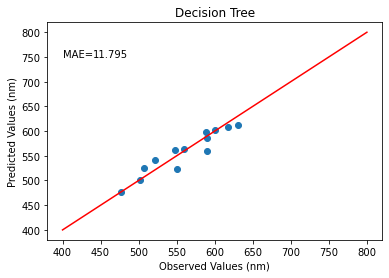

In [11]:
ET_regr = ExtraTreesRegressor(n_estimators=3, 
                                            max_features=13,
                                            random_state=51)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
ET_mae = mean_absolute_error(Y_test, ET_Y_pred)
ET_mse = mean_squared_error(Y_test, ET_Y_pred)
print("Mean absolute error =", round(ET_mae,3), '\n' "Mean squared error =", round(ET_mse,3))

plt.figure()
plt.title("Decision Tree")
plt.plot(Y_test, ET_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(ET_mae,3) , fontdict=None)
plt.show()

### 5. Gradient Boosting

In [9]:
min_mae = 999
min_i, min_j, min_k, min_l = 0, 0, 0.0, 0
for i in tqdm(range(320, 400, 10)):
    for j in range(2, 24, 2):
        for k in np.arange(0.08, 0.22, 0.02):
            for l in range(2, 18, 4):
                GB_regr = GradientBoostingRegressor(n_estimators=i, max_depth=j, learning_rate=k, random_state=l)
                GB_regr.fit(X_train, np.ravel(Y_train))
                GB_Y_pred = GB_regr.predict(X_test)

                mae = mean_absolute_error(Y_test, GB_Y_pred)
                if (min_mae > mae):
                    min_mae = mae
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l

print(min_mae, min_i, min_j, min_k, min_l)

100%|██████████| 8/8 [08:23<00:00, 62.96s/it]

18.514535245824483 320 8 0.22000000000000003 10


In [ ]:
GB_regr = GradientBoostingRegressor(n_estimators=540, max_depth=4, learning_rate=0.18, random_state=67)

            
GB_regr.fit(X_train, np.ravel(Y_train))
            
GB_Y_pred = GB_regr.predict(X_test)
            
GB_mae = mean_absolute_error(Y_test, GB_Y_pred)
print("Mean absolute error =", round(GB_mae,3))

plt.figure()
plt.title("Gradient Boosting")
plt.plot(Y_test, GB_Y_pred, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([400,800],[400,800], color = 'r')
plt.text(400, 750, 'MAE=' , fontdict=None)
plt.text(440, 750, round(GB_mae,3) , fontdict=None)
plt.show()

### 6. Others

In [10]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mean absolute error is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(' MAE for diameter is ', mae, '\n')

K-nn
 MAE for diameter is  16.184615384615373 

Ridge
 MAE for diameter is  18.110791212932252 

Lasso
 MAE for diameter is  19.560952909058933 

ElasticNet
 MAE for diameter is  18.19936624046899 



## Conclusion

Decision Tree gave the best performance.

### Saving model

In [18]:
ET_regr = ExtraTreesRegressor(n_estimators=3, 
                                            max_features=13,
                                            random_state=51)
            
ET_regr.fit(X_train, np.ravel(Y_train))
            
ET_Y_pred = ET_regr.predict(X_test)
            
joblib.dump(ET_regr, "./model_aug_emission_ExtraTrees.joblib")


['./model_aug_emission_ExtraTrees.joblib']